In [13]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.7.0


In [14]:
import warnings
warnings.filterwarnings(action='ignore')


In [15]:
from sklearn import datasets

In [17]:
housing = datasets.load_boston()

NameError: name 'load_diabetes' is not defined

In [5]:
X_data = housing.data
X_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
y_data = housing.target
y_data

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### 전처리

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 13) (455,)
(51, 13) (51,)


### model만들기

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


def build_model(num_input=1):
    model = Sequential()##Layer 쌓을 수 있도록 객체를 생성 
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=13)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)
history #  epochs: 훈련 데이터셋에 포함된 모든 데이터들이 한 번씩 모델을 통과한 횟수로, 모든 학습 데이터셋을 학습하는 횟수를 의미
# verbose : 자세히 보여줘라

NameError: name 'X_train' is not defined

In [10]:
history.history['mae'][:3]

NameError: name 'history' is not defined

In [11]:
history.history['loss'][:3]

NameError: name 'history' is not defined

In [33]:
eva_test=model.evaluate(X_test, y_test)
eva_test

2/2 [==============================] - 0s 16ms/step - loss: 10.3196 - mae: 2.2720


[10.319646835327148, 2.2719948291778564]

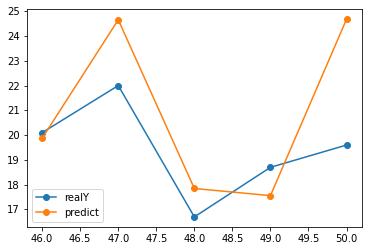

In [34]:
import matplotlib.pyplot as plt
X=[46,47,48,49,50]
plt.plot(X, y_test[46:],marker = 'o',label='realY')

plt.plot(X, pred_test[46:],marker = 'o',label='predict')

plt.legend()

plt.show()

In [26]:
pred_test = model.predict(X_test)
pred_test[46:]

array([[19.872667],
       [24.653477],
       [17.847054],
       [17.559647],
       [24.675049]], dtype=float32)

In [27]:
y_test[46:]

array([20.1, 22. , 16.7, 18.7, 19.6])

In [25]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, pred_test, multioutput='variance_weighted')
R2

0.8669132651798365

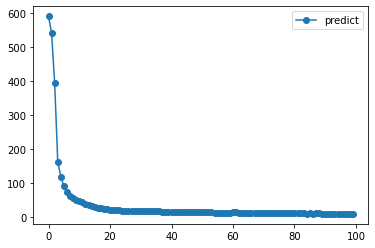

In [45]:
X=[0,1,2]

plt.plot(history.history['loss'],marker = 'o',label='predict')

plt.legend()

plt.show()

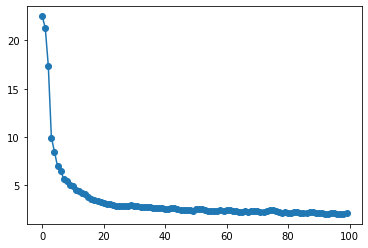

In [44]:
plt.plot(history.history['mae'],marker = 'o',label='predict')